In [136]:
import pandas as pd
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from scipy.stats import binned_statistic

In [2]:
bin_size = 1000

In [3]:
df = pd.read_table('/home/claudio/nas/output/all_env.plot', sep = '\t')

In [4]:
all_df = df.drop(df.columns[[1,2,5,6,7,8]], axis = 1)

In [5]:
conditions = sorted(list(set(all_df['COND'])))

In [6]:
bin_list = [i for i in range(0, max(all_df['BP']), bin_size)]

In [81]:
d = {}
for condition in conditions:
    d.setdefault(condition, {})
    cond_df = all_df[all_df['COND'] == condition]
    statistic, edges, bin_nr = binned_statistic(cond_df['BP'], cond_df['P'], min, bin_list)
    bins = [(i,k) for i,k in zip(edges, edges[1:])]
    pval_bin = zip(statistic,bins)
    for i,k in pval_bin:
        if np.isnan(i):
            i = 1
        d[condition][k] = i

In [85]:
df = pd.DataFrame(d).transpose().apply(lambda x: -(np.log10(x)), axis = 1)

In [132]:
df.index.values

array(['A22.0P5', 'A22.0P5UM', 'A22.1', 'A22.1UM', 'A22.2', 'A22.2P5UM',
       'A22.5UM', 'A22.CCCP', 'A22.CEFSULODIN', 'A22.CEPHALEXIN',
       'A22.CHIR090', 'A22.EDTA', 'A22.FOSFOMYCIN', 'A22.PYOCYANIN',
       'AHASBTB06584.0P5', 'AMIKACIN.PROCAINE', 'AMINOSALICILICACID.100',
       'AMOXICILLIN.0P25UM', 'AMOXICILLIN.0P5UM', 'AMOXICILLIN.1UM',
       'ARTICAINE.100', 'BENZALKONIUM.25', 'BENZALKONIUM.CHLORHEXIDINE',
       'BENZALKONIUM.POLYMIXINB', 'BENZALKONIUM.PROCAINE',
       'BERBERINE.200', 'BERBERINE.50', 'BILESALTS.0P05', 'BIPYRIDYL.200',
       'BIPYRIDYL.40C', 'BIPYRIDYL.A22', 'BIPYRIDYL.CEFSULODIN',
       'BIPYRIDYL.TOBRAMYCIN', 'BLEACH.0P01', 'BLEOMYCIN.0P1UM',
       'BLEOMYCIN.0P5UM', 'BLEOMYCIN.1UM', 'BOVINESERUM.0P1',
       'BROMODEOXYURIDINE.200', 'CARBAMAZEPINE.100', 'CCCP.2',
       'CEFSULODIN.24', 'CEFSULODIN.AMOXICILLIN', 'CEFSULODIN.CEFACLOR',
       'CEFSULODIN.MECILLINAM', 'CEFSULODIN.PIPERACILLIN',
       'CEPHALEXIN.16', 'CERULENIN.1UM', 'CERULENIN.2UM

In [94]:
class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

AttributeError: 'QuadMesh' object has no property 'col_cluster'

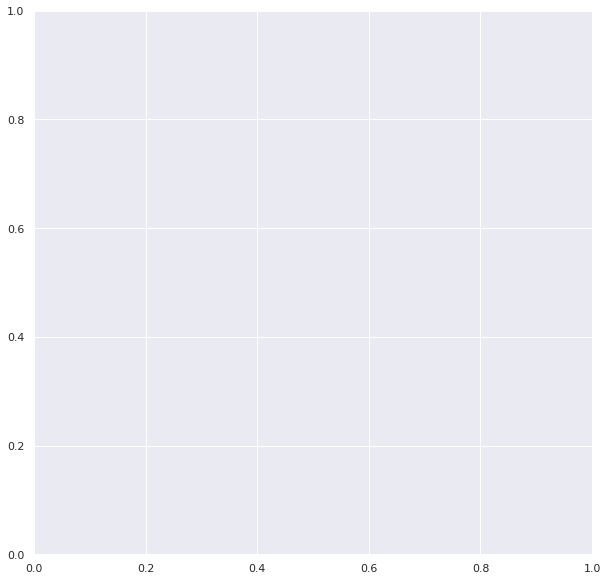

In [162]:
plt.figure(figsize=(10,10))
sns.heatmap(df , vmax = 8, yticklabels = False, cmap='viridis', norm=MidpointNormalize(midpoint=5), col_cluster=False)

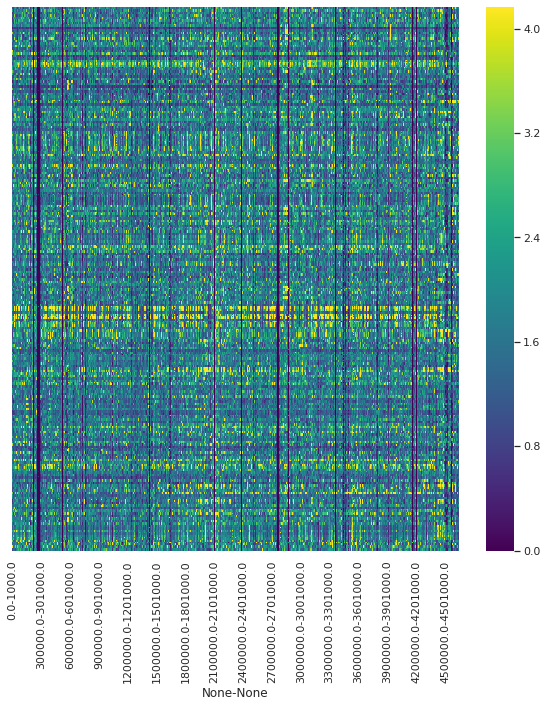

In [161]:
plt.figure(figsize=(10,10))
sns.heatmap(df ,robust=True, yticklabels = False, cmap='viridis', xticklabels = 300)

<Figure size 3600x3600 with 0 Axes>

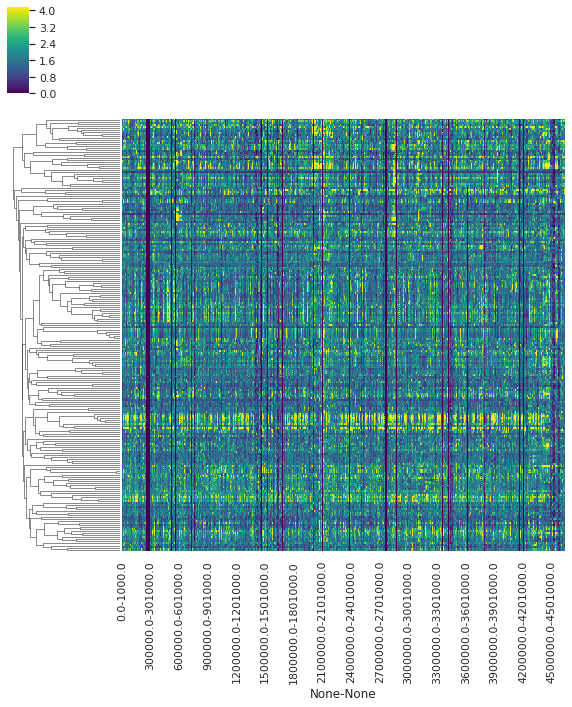

In [148]:
plt.figure(figsize=(50,50))
sns.set(font_scale = 1)
sns.clustermap(df, col_cluster = False, robust = True, metric = "correlation", yticklabels = False, xticklabels = 300, cmap = "viridis")